<center> <h5>Wintersemester 2024/25</h5> </center>
<center> <h1>Medizinische Bildanalyse</h1> </center>
<center> <h3>Aufgabenblatt 2</h3> </center>
<center> <h5>21. Oktober 2024</h5> </center>
<center> <h5>
    Prof. Dr. Thomas Schultz, 
    <a href = "mailto: jlen@uni-bonn.de">Jonathan Lennartz</a>,
    <a href = "mailto: jgruen@uni-bonn.de">Dr. Johannes Grün</a>
</h5> </center>
<center> <h5>Abgabefrist: <b>28.10.2024, 10:00 Uhr, via eCampus</b></h5> </center>
</br>

* Bei Fragen bezüglich der Aufgaben nutzt das Forum in eCampus
  
* Die Aufgaben können in Gruppen von **bis zu drei** Studierenden abgegeben werden (eine Abgabe pro Gruppe). Findet euch dazu auf eCampus in Teams zusammen.
* Ladet die Abgaben in einem Zip-Archiv hoch. Es sollte das Notebook selbst, einen Export als HTML oder PDF und alle nötigen Datein enthalten, um die Ergebnisse zu reproduzieren.

### Aufgabe 1 (Histogrammausgleich und Histogramm-Matching, 18 Punkte)

Adaptive optics scanning light ophthalmoscopy (AOSLO) ist ein in vivo Bildgebungsverfahren für Zapfen- und Stäbchenrezeptoren der menschlichen Retina (siehe Abbildung 1; Helle Punkte weisen auf Photorezeptoren hin). Während des Prozesses enstehen Zwischenergebnisse in niedrigerer Qualität (rechts) bevor ein endgültiges Ergebnis in hoher Qualität verfügbar ist (links). In dieser Aufgabe lernen wir verschiedene Bildverarbeitungstechniken kennen, die zu einem ganz ähnlichen Ergebnis führen. Wir nutzen dafür die Verfahren von scikit-image.

<table><tr>
    <td><img alt="Reference" src="reference.png" width="95%"> </td>
    <td><img alt="aoslo" src="aoslo.png" width="95%"></td>
</tr></table>
Abbildung 1: AOSLO Referenzbild in hoher Qualität (links). Version mit niedrigem Kontrast (rechts).

Schreibt eine Funktion, die als Eingabe zwei Bilder erwartet und sowohl die Bilder selbst, als auch deren Histogramme in einem Plot darstellt. Benutzt verschiedene Farben mit geeigneter Transparenz um überlappende Wertebereiche sichtbar zu machen. Wendet die Funktion auf die Bilder reference.png und aoslo.png an. *Tipp: matplotlib bietet Funktionen für das Plotten von Histogrammen.* (4P) 

In [8]:
# Importiert Bibliotheken
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

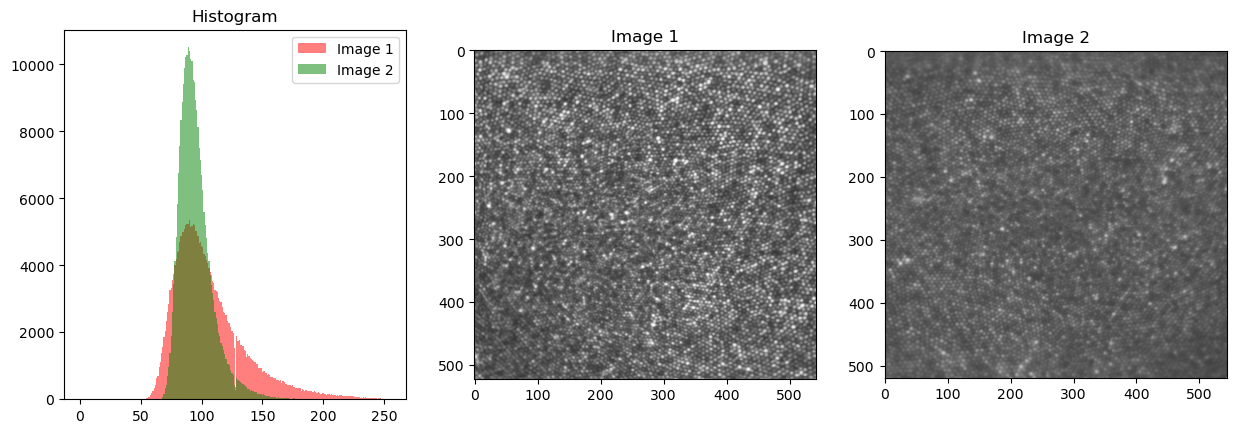

In [9]:
# Definiert eure Funktion 
def plot_hist_overlap(img1, img2):
    fig, axes = plt.subplots(1, 3)

    axes[0].set_title("Histogram")
    axes[0].hist(img1.flatten(), bins=256, color=('red', 0.5), label="Image 1")
    axes[0].hist(img2.flatten(), bins=256, color=('green', 0.5), label="Image 2")
    axes[0].legend()

    axes[1].set_title("Image 1")
    axes[1].imshow(img1, cmap="gray")

    axes[2].set_title("Image 2")
    axes[2].imshow(img2, cmap="gray")

    fig.set_figwidth(15)

    plt.show()    


img_ref = ski.io.imread("reference.png")
img_aoslo = ski.io.imread("aoslo.png")

plot_hist_overlap(img_ref, img_aoslo)

Schreibt eine Funktion zum Histogrammausgleich und gleicht damit das Histogram vom AOSLO-Bild in niedriger Qualität dem in hoher Qualität an. *Tipp: In der scikit-image Bibliothek findet ihr Funktionen, die euch diese und die folgenden Aufgaben erleichtern.* (2P)

In [10]:
# Definiert eure Funktion 

def hist_equalization(img_in, img_target):
    return ski.exposure.equalize_hist(img_in, nbins=256)

Neben dem regulären Histogrammausgleich bietet *scikit-image* auch einen *adaptiven* Histogrammausgleich an. Findet heraus, wie sich dieser von dem in der Vorlesung besprochenen Histogrammausgleich unterscheidet und wendet ihn auf das AOSLO-Bild in niedriger Qualität an. Visualisiert die Ergebnisse beider Varianten und vergleicht. Bezieht dabei sowohl die resultierenden Histogramme, als auch die verbesserten Bilder mit ein. Welche Methode eignet sich besser für diese Aufgabe? Könnt ihr euch einen Fall vorstellen, indem die jeweils andere Methode geeigneter wäre? Gebt ein Beispiel. Welche Auswirkung hat es, wenn man die Kerngröße in der adaptiven Variante ändert? *Tipp: Ihr könnt die Plot-Funktion aus der vorherigen Aufgabe nutzen* (6P)

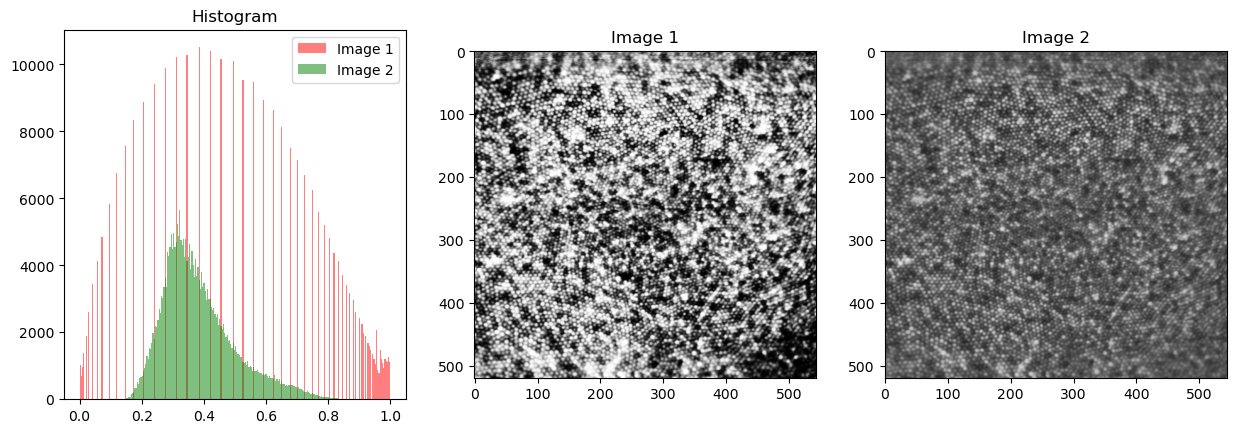

In [11]:
# Definiert eure Funktion 

def adaptive_hist_equalization(img_in, img_target):
	return ski.exposure.equalize_adapthist(img_in, nbins=256)

img_eq = hist_equalization(img_aoslo, img_ref)
img_adapteq = adaptive_hist_equalization(img_aoslo, img_ref)

plot_hist_overlap(img_eq, img_adapteq)


Der Unterschied besteht darin das mehrere Histogramme bei Adaptiven Histogrammausgleich berechnet werden welche zu unterschiedlichen Bereichen des Bildes gehören. Es verändert dann Helligkeitsverteilung des Bildes. Dadurch das wir global Rezeptoren untersuchen wollen ist es sinvoller das Histogrammausgleichsverfahren aus der Vorlesunzgu Nutzen, welches das Bild Global betrachtet. 

Statt eine Gleichverteilung aller Intensitäten strebt ein *Histogramm-Matching* dasselbe Histogramm an wie in einem Referenzbild. Auch dies ist in *scikit-image* implementiert. Schreibt eine dritte Funktion um das Histogram eines Bildes dem eines anderen anzugleichen und wendet sie an wie zuvor. Vergleicht das verbessert Bild mit den Resultaten eures Histogrammausgleichs aus vorherigen Aufgaben. Leitet ähnlich wie in der Vorlesung eine Formel für *histogram matching* her und begründet, warum ein Histogrammausgleich einen Spezialfall darstellt. *Tipp: Auch hier lohnt sich ein Blick in die scikit image Bibliothek* (6P)

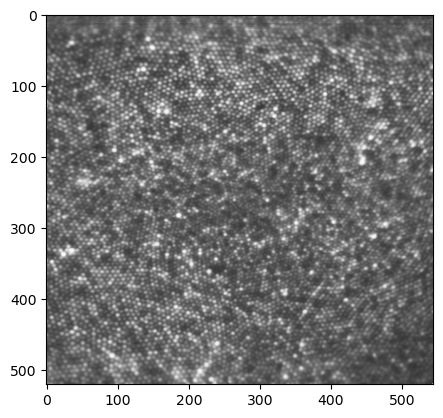

In [12]:
# Definiert eure Funktion 

def hist_matching(img_in, img_target):
    return ski.exposure.match_histograms(img_in, img_target)

img_match = hist_matching(img_aoslo, img_ref)
plt.imshow(img_match, cmap="gray")

### Aufgabe 2 (Finite Differenzen, 10 Punkte)

a) In der Vorlesung haben wir die Berechnung von Bildgradienten mittels finiter Differenzen kennen gelernt. Die Vorwärtsdifferenz in x-Richtung ist dabei gegeben durch:  
$$\frac{\delta f}{\delta x}[x,y] \approx F[x+1, y] - F[x, y]$$

Diese Formel geht davon aus, dass Pixel eine Einheit breit sind. Wie müssen wir sie modifizieren, um eine abweichende Breite $h_x$ zu berücksichtigen? (1P)

_Lösung:_ $\frac{\partial f}{\partial x} [x,y] \approx F[x + h_x, y] - F[x,y]$

b) Im Gegensatz zur Vorwärtsdifferenz bezieht die **zentrale** Differenz, wie der Name vermuten lässt, die benachbarten Pixel auf beiden Seiten mit ein. Leitet unter Berücksichtigung der Pixelbreit $h_x$ die dazugehörige Formel her. (1P)

_Lösung:_ $\frac{\partial f}{\partial x} [x,y] \approx F[x + h_x, y] - F[x - h_x,y]$


c) Betrachtet die Taylorreihenentwicklung von $f$ und vergleicht sie mit den Formeln für die zentrale und die Vorwärtsdifferenz. Welcher Approximationsfehler für die Berechnung der ersten Ableitung ergibt sich jeweils? Konvergieren beide Formeln gegen die kontinuierliche Ableitung, wenn wir dasselbe Bild mit einem immer feiner aufgelösten Pixelgitter betrachten $(h_x\rightarrow 0)$? Wenn ja, konvergiert eine davon schneller als die andere? (5P)

_Lösung:_
Betrachten die Taylorreihenentwicklung von $ f(x) $ um $ x_0 $:

$$
f(x_0 + h_x) = f(x_0) + f'(x_0) h_x + \frac{f''(x_0)}{2} h_x^2 + \mathcal{O}(h_x^3)
$$
$$
f(x_0 - h_x) = f(x_0) - f'(x_0) h_x + \frac{f''(x_0)}{2} h_x^2 - \mathcal{O}(h_x^3)
$$

### Vorwärtsdifferenz:

Die Vorwärtsdifferenz zur Approximation der Ableitung ist:
$$
f'_{\text{vorwärts}}(x_0) = \frac{f(x_0 + h_x) - f(x_0)}{h_x}
$$
Setzen wir die Taylorreihe für $ f(x_0 + h_x) $ ein:
$$
f'_{\text{vorwärts}}(x_0) = f'(x_0) + \frac{f''(x_0)}{2} h_x + \mathcal{O}(h_x^2)
$$
Der Approximationsfehler ist also $ \mathcal{O}(h_x) $, also von erster Ordnung.

### Zentrale Differenz:

Die zentrale Differenz lautet:
$$
f'_{\text{zentral}}(x_0) = \frac{f(x_0 + h_x) - f(x_0 - h_x)}{2 h_x}
$$
Setzen wir die Taylorreihen für $ f(x_0 + h_x) $ und $ f(x_0 - h_x) $ ein:
$$
f'_{\text{zentral}}(x_0) = f'(x_0) + \mathcal{O}(h_x^2)
$$
Der Approximationsfehler ist also $ \mathcal{O}(h_x^2) $, also von zweiter Ordnung.

### Vergleich und Konvergenz:

- **Vorwärtsdifferenz**: Fehler $ \mathcal{O}(h_x) $, konvergiert langsamer.
- **Zentrale Differenz**: Fehler $ \mathcal{O}(h_x^2) $, konvergiert schneller.




d) Schreibt eine Python-Funktion, die für jeden Pixel eines Bildes die Ableitung in x-Richtung sowie die Gradientennorm wahlweise mit der zentralen oder der Vorwärtsdifferenz berechnet. Wendet sie anschließend auf das Bild _img_ an, das sich in der folgenden Code-Zelle befindet. Seht ihr einen Vorteil von der einen zur anderen Variante? (3P)
_Tipp: Ihr findet eine Faltungsoperation z.B. in scipy._

_Lösung:_


In [13]:
# Lösung
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

img = np.zeros((32, 32))
img[8:-8, 16:20] = 1

def zentrale_differenz(img):
	kernel = np.zeros((3, 3))
	kernel[1, 1] = 1
	kernel[1, 0] -1

	return sp.signal.convolve(img, kernel)

def vorwaerts_differenz(img):
	kernel = np.zeros((3, 3))
	kernel[1, 0] = -1
	kernel[1, 2] = 1;

	return sp.signal.convolve(img, kernel)


### Aufgabe 3 (Median-Filter, 10 Punkte)

In dieser Aufgabe beschäftigen wir uns mit dem nicht-linearen Median-Filter und vergleichen ihn mit einem linearen Filter aus der Vorlesung.  
</br>
a) Lest das Bild brain.png aus dem Archiv des Arbeitsblattes in den Arbeitsspeicher. Verrauscht das Bild mit Salz-und-Pfeffer-Rauschen, indem ihr 5000 zufällig ausgewählte Pixel entweder schwarz oder weiß färbt. (2P)

In [14]:
# Lösung hier
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

# Lest das Bild ein
img_brain = ski.io.imread("brain.png")

# schreibt eine Funktion zum Verrauschen von Bildern

def salt_and_pepper(img, n_pixels=5000):
    img_noisy = np.copy(img)
    for i in range(n_pixels):
        x = np.random.randint(0, len(img_noisy))
        y = np.random.randint(0, len(img_noisy[0]))

        img_noisy[x, y] = np.random.randint(0, 2) * 255

    return img_noisy

img_salt_pepper_brain = salt_and_pepper(img_brain)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(img_brain, cmap="gray")
axes[1].imshow(img_salt_pepper_brain, cmap="gray")

b) Das Ergebnis des Median-Filters für eine bestimmte Position im Bild ist der Median der Pixelwerte in dessen $h \times w$ -Nachbarschaft. Implementiert diesen Filter in einer Funktion. Eure Funktion bekommt die Filtergröße als Argument. Achtet darauf, die Bildränder sinnvoll zu behandeln. *Tipp: Wir erwarten in diesem Fall, dass Ihr den Filter selbst implementiert. Allerdings könnt ihr eure Ergebnisse gern mit fertigen Implementationen verifizieren.* (4P)

In [15]:
# Lösung hier

def median_filter(img, size, border_handling='periodic'):
    # ihr könnt natürlich eine andere Methode für den Rand benutzen
    pass

c) Wendet euren Filter auf euer verrauschtes Bild an. Um eine geeignete Filtergröße festzustellen, vergleicht das gefilterte Bild mit dem Original, indem ihr die Differenz visualisiert. Wählt eine geeignete Größe und plottet die Differenz in der Konsole. (2P)

In [16]:
# Lösung hier

def total_diff(img_filtered, img_orig):
    # es genügt, die Differenz einfach zu plotten. 
    pass

d) Wendet nun einen Gaussfilter auf das verrauschte Bild an mit einer Standardabweichung, die für euch gut funktioniert. Welcher Filter eignet sich besser? Vergleicht mit dem Median-Filter und den Differenz-Plots aus der vorherigen Aufgabe. Erklärt euren Befund. *Tipp: Hier könnt ihr den Gaussfilter von skimage nutzen.* (2P)

In [17]:
# Lösung hier



### Aufgabe 4 (Schichtensegmentierung durch Kantenerkennung, 12 Punkte)

<center><img src="bscan_layers.png" width="50%"/></center>
<br/>
<center>Querschnitt einer Retina, aufgenommen mittels optischer Kohärenztomographie. Markiert sind die innere limitierende Membran (ILM) sowie die Grenze von Innensegment und Außensegment (IS/OS) der Fotorezeptoren.</center>
<br/>
In dieser Aufgabe nutzen wir Kantenerkennung, um die innere limitierende Membran und die Grenze von Innensegment und Außensegment der Fotorezeptoren automatisch aus einem Bild der Optischen Kohärenztomographie zu extrahieren (siehe Abbildung). Ihr könnt für die gesamte Aufgabe die Implementierungen von skimage nutzen.
<br/>
a) Ladet das Bild bscan.png in den Arbeitsspeicher und wendet die Canny-Kantenerkennung an. Speichert das Ergebnis in einer separaten Variable. (2P)

In [18]:
# Lösung hier



b) Findet nun einen geeigneten Wert für den $\sigma$-Parameter, um das Bild vor der Kantenerkennung geeignet zu entrauschen. Wählt die restlichen Parameter der Canny-Kantenerkennung so, dass das Segment zwischen ILM und IS/OS extrahiert werden kann. (3P)

In [19]:
# Lösung hier



c) Nutzt anstelle des Gaussfilters erst einen bilateralen Filter und wendet anschließend den Median-Filter mit Kerngröße 9 an. Visualisiert das Ergebnis. (4P)

In [20]:
# Lösung hier



d) Wendet nun den Canny-Kantenerkennung auf das Resultat aus Aufgabenteil c) an. Wählt die Parameter so, dass dabei keine Gaussfilterung stattfindet. Wählt die restlichen Parameter so, dass das Ergebnis etwa dem aus der Abbildung entspricht und vergleicht das Ergebnis mit dem Resultat aus Aufgabenteil b). Welche Variante funktioniert besser? Erklärt warum. (3P)

In [21]:
# Lösung hier

